# CODTECH INTERNSHIP TASKS: DATA ANALYSIS


## INTERNSHIP TASK 2: PREDICTIVE ANALYSIS USING MACHINE LEARNING

## Predicting House Prices with Linear Regression

### Dataset Link: https://www.kaggle.com/code/ashydv/housing-price-prediction-linear-regression/input


###  Step 1: Import Libraries and load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.head() # Display first 5 rows

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()  # Display basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Step 2: Data Cleaning: Handling missing values

In [6]:
df.isnull().sum()  # Checking for missing values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Data Cleaning and Preprocessing


In [9]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [10]:
# Display the updated dataframe

print(df.head())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2             1   
1  12250000  8960         4          4        4        3             1   
2  12250000  9960         3          2        2        2             1   
3  12215000  7500         4          2        2        3             1   
4  11410000  7420         4          1        2        2             1   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0              0             0                    0                    1   
1              0             0                    0                    1   
2              0             1                    0                    0   
3              0             1                    0                    1   
4              1             1                    0                    1   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0             1  

### Step 3: Check Outliers

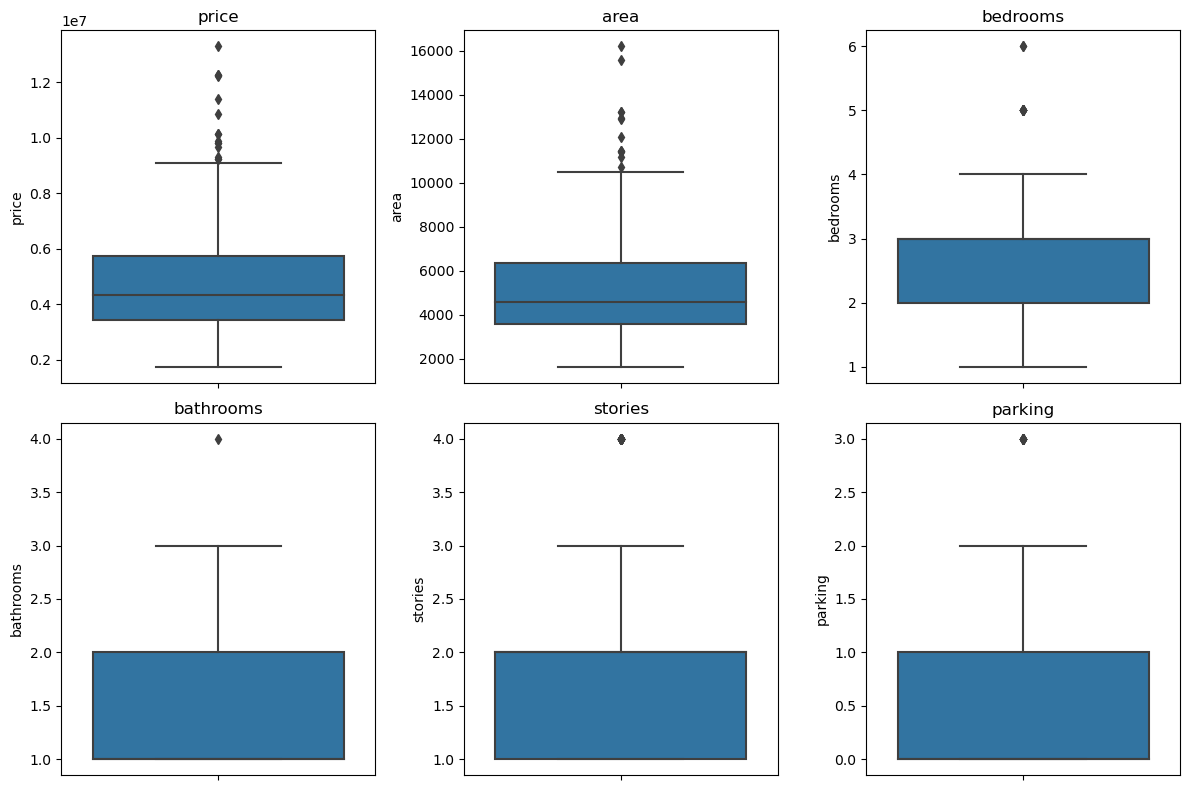

In [11]:
# Plot boxplots for numerical features

numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

#### Insights: Price and area have considerable outliers, so we need to drop the outliers.

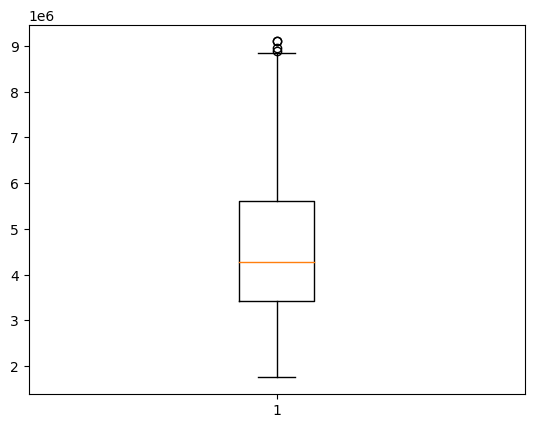

In [13]:
#outlier treatment for price

plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

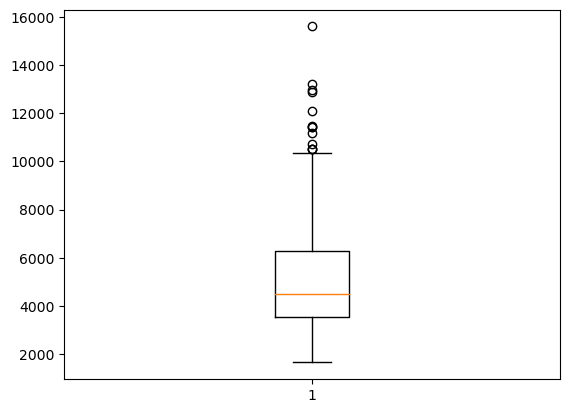

In [14]:
# outlier treatment for area
plt.boxplot(df.area)
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

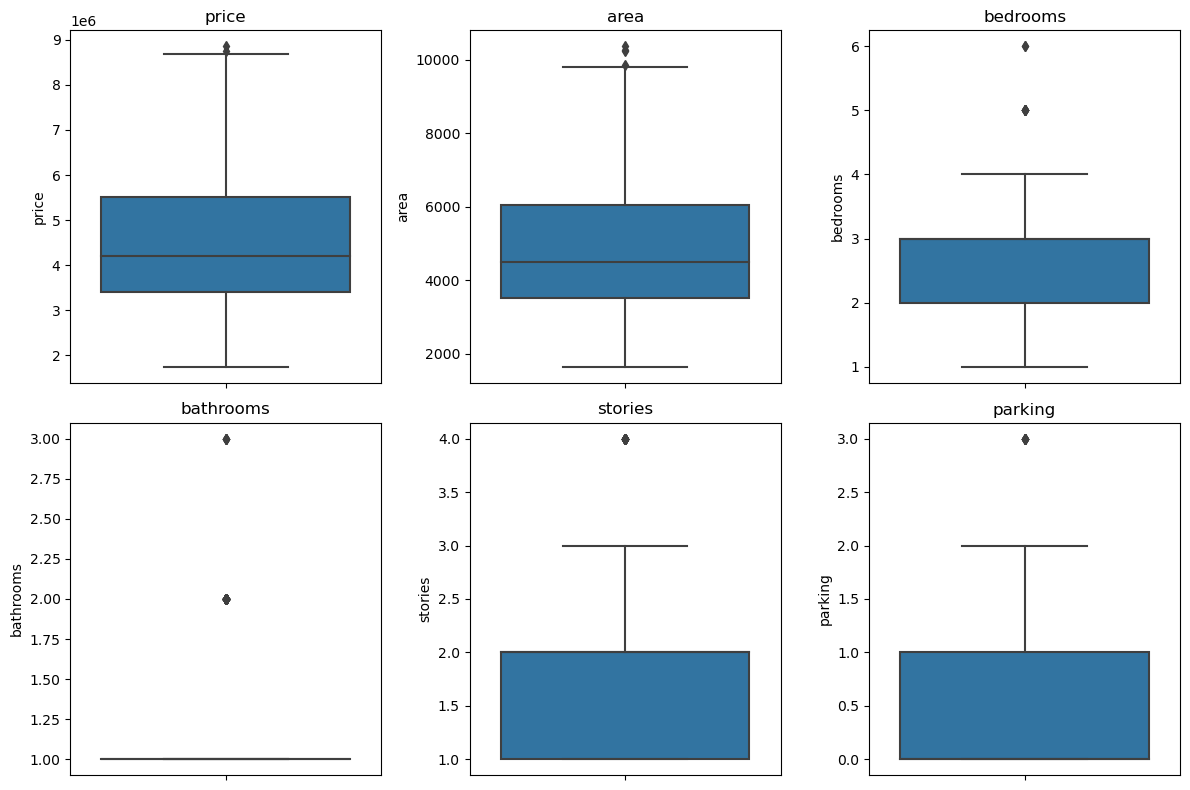

In [15]:
# Plot boxplots for numerical features
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

### Step 4: Feature Selection


### Correlation Analysis

#### Correlation Analysis: To identify features that have a strong relationship with the target variable. Here price is the target variable (dependent variable or response variable)  because the goal is to predict house prices based on the given features(independent variable).
#### We’ll compute the correlation matrix and identify features that are highly correlated with price.

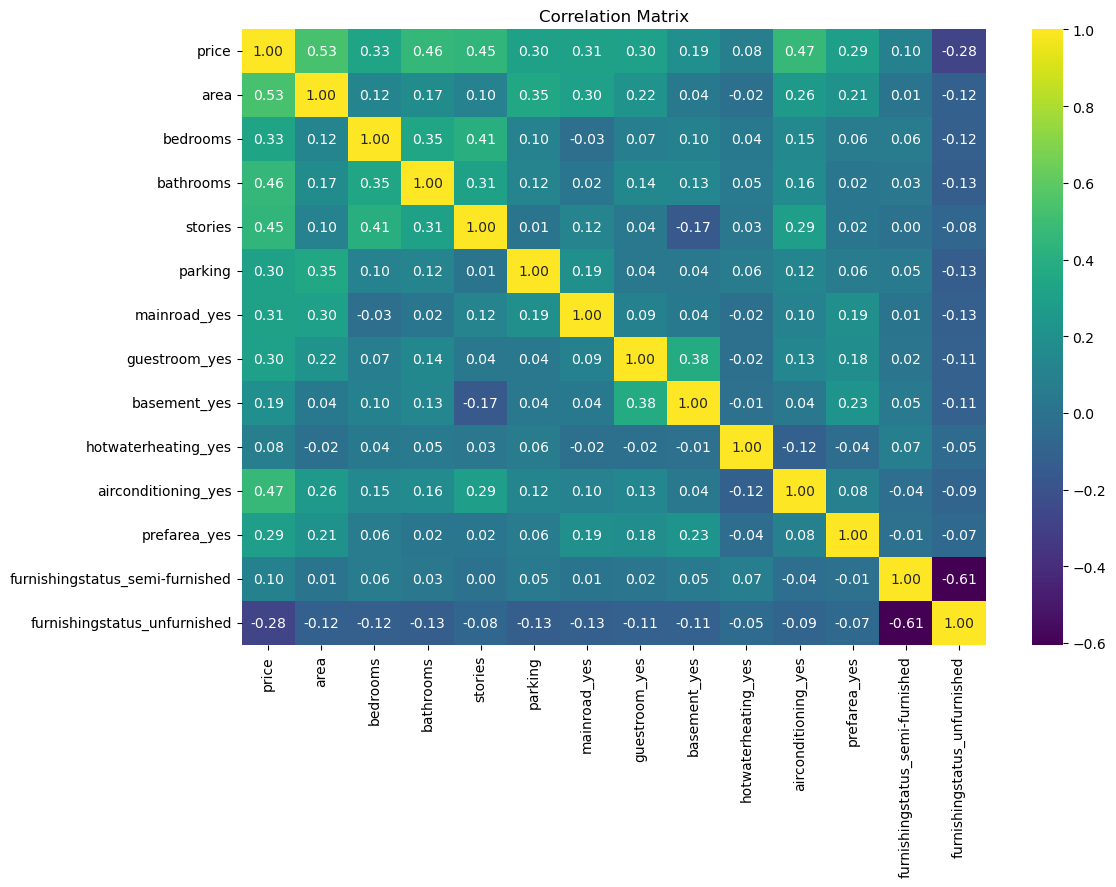

In [18]:
# Plot the correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Check correlation of features with the target variable (price)

print(df.corr()['price'].sort_values(ascending=False))

price                              1.000000
area                               0.533536
airconditioning_yes                0.468715
bathrooms                          0.461507
stories                            0.445793
bedrooms                           0.329910
mainroad_yes                       0.307775
parking                            0.304532
guestroom_yes                      0.297684
prefarea_yes                       0.288897
basement_yes                       0.189336
furnishingstatus_semi-furnished    0.096151
hotwaterheating_yes                0.083139
furnishingstatus_unfurnished      -0.284313
Name: price, dtype: float64


### Domain Knowledge 


#### To select features that are logically important for predicting house prices. Based on the correlation analysis and domain knowledge, we’ll select the following features.

In [20]:
# Select relevant features

selected_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 'airconditioning_yes']

# Update the dataset with selected features
X = df[selected_features]  # Features
y = df['price']  # Target variable
X

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,airconditioning_yes
19,6420,3,2,2,1,1,0,1
20,4320,3,1,2,2,1,0,0
21,7155,3,2,1,2,1,1,1
22,8050,3,1,1,1,1,1,1
23,4560,3,2,2,1,1,1,1
...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,1,0,0
541,2400,3,1,1,0,0,0,0
542,3620,2,1,1,0,1,0,0
543,2910,3,1,1,0,0,0,0


In [21]:
y

19     8855000
20     8750000
21     8680000
22     8645000
23     8645000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 513, dtype: int64

### Step 5: Model Training

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train:', X_train)

X_train:      area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
351  3600         2          1        1        0             1              0   
360  4040         2          1        1        0             1              0   
203  5400         4          1        2        0             1              0   
303  4500         3          1        1        0             1              0   
524  3264         2          1        1        0             1              0   
..    ...       ...        ...      ...      ...           ...            ...   
132  5200         3          1        3        0             1              0   
301  3520         3          1        2        0             1              0   
379  3520         3          1        1        2             1              0   
467  3240         3          1        2        2             1              0   
127  6500         3          2        3        0             1              0   

     airconditioni

In [24]:
print('X_test:', X_test)

X_test:      area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
335  3816         2          1        1        2             1              0   
528  3970         1          1        1        0             0              0   
471  3750         3          1        2        0             1              0   
181  7200         3          1        2        1             1              1   
530  1950         3          1        1        0             0              0   
..    ...       ...        ...      ...      ...           ...            ...   
428  4040         2          1        1        1             1              0   
197  2800         3          2        2        1             0              0   
306  4840         3          1        2        1             1              0   
536  3420         5          1        2        0             0              0   
540  3000         2          1        1        2             1              0   

     airconditionin

In [25]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Use the trained model to make predictions on the test data.

y_pred = model.predict(X_test)
y_pred

array([4332159.73737564, 2602686.92983247, 3787211.52044343,
       5390853.83782958, 2357507.56676921, 5269947.86383864,
       5788202.74467041, 2661857.14497764, 4445484.32817432,
       4049500.59543065, 3846468.52631644, 5194556.97830884,
       4276652.45127717, 4428339.43284405, 6039751.67587356,
       4781073.19502682, 7422263.66621694, 6329166.84381862,
       4354354.96623063, 5842284.2040702 , 3603640.00496453,
       3983785.66858848, 4056906.44172185, 4023290.33917048,
       5798283.90324377, 4501042.2041137 , 5544297.23624408,
       3505740.74254665, 4247893.10294288, 4516972.5012375 ,
       3264142.22340613, 3268586.4988466 , 4812559.4868107 ,
       6173159.98925057, 4791898.56743729, 3139164.59774744,
       3183689.86909488, 4197643.11011316, 5500061.03486861,
       4374676.65446015, 3752146.60655759, 7075077.961478  ,
       4540056.29247701, 5501580.87201502, 3266117.45693523,
       3839061.40058231, 4859559.35329758, 3728816.92860756,
       3273687.26572662,

### Step 6: Model Evaluation


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 995088713797.961
R-squared: 0.634537441464688


### Step 7: Visualization

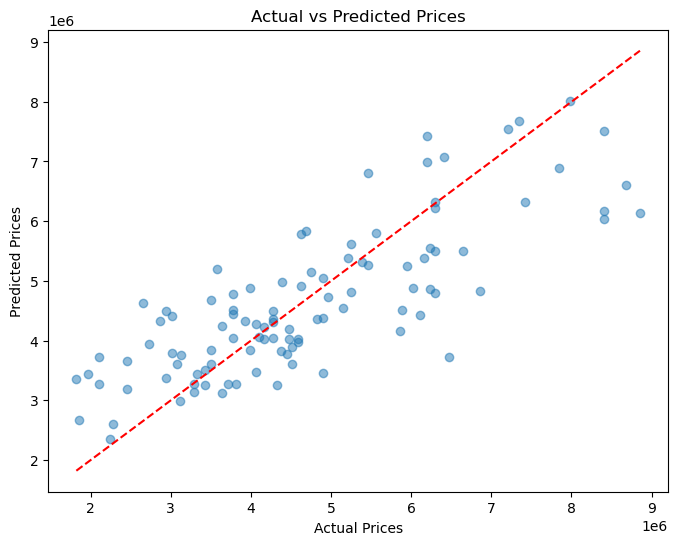

In [29]:
# Scatter plot of actual vs predicted values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')   # Diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

#### Insights: As the points lie close to the diagonal line, it means the model's predictions are accurate.